# Homework 05

### Exercise 1 - Terminology

Describe the following terms with your own words:

***boolean array:*** An array consisting of boolean values, that indicate if a condidtion is True or False regarding every element in an array

***shape:*** how many elements a dismension contains

***axis:*** represents the dimension

Answer the following questions:

***Which ways are there to select one or more elements from a Numpy array?*** fancy indexing, slicing, numpy functions (e.g. argmin, argmax)

***What is the difference between Numpy and Scipy?*** numpy is the base library and scipy is a package building on top of numpy 

### Exercise 2 - Download data from entsoe-e for Lecture 6

For lecture 6, we need to download data from the Entso-e [transparency platform](https://transparency.entsoe.eu/): Entso-e provides (almost) real-time data on European electricity systems. We will download hourly load data (i.e. electricity demand) for all systems in Europe. First, you need to get a user account at Entsoe-e [here](https://transparency.entsoe.eu/usrm/user/createPublicUser). 

We are going to use the S-FTP server of Entso-e. To use S-FTP in Python, you have to install the package pysftp. You can do so here in the notebook by executing the following command (please be aware that this may take some time):

In [1]:
!conda install -c conda-forge pysftp --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Noah Auditore\anaconda3

  added / updated specs:
    - pysftp


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.3                |   py37hc8dfbb8_1         3.1 MB  conda-forge
    pysftp-0.2.9               |             py_1          15 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  pysftp             conda-forge/noarch::pysftp-0.2.9-py_1
  python_abi         conda-forge/win-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  conda                       pkgs/main::conda-4.8.3-py37_0 --> conda-forge::conda-4.8.3-py37hc8dfbb8_1




conda-4.8.3 

Now we are ready to download the data. In principle, you simply have to fill out your account information (by setting ```USER``` and ```PWD```), decide where to put the data locally by assigning a path to a ```DOWNLOAD_DIR``` and run the 4 cells below. If the download directory does not exist, it will be created. The download will take some time, so you may want to run the script overnight. 

If the download fails at some point, you can restart it by simply executing the cell again. Files which are already downloaded will not be downloaded again. ***Hint:*** I had problems downloading to a directoy which was on a google drive - so if you run into an error message, which says ```OSError: size mismatch in get!``` you may want to choose a directory which is not on a google drive or possibly a dropbox. Also, this error may occur if your disk is full. 

In [2]:
import os
import pysftp

# if you want, you can modify this too, per default it will create a folder
# in the parant folder of the homework repository:
DOWNLOAD_DIR = 'F:\\scientific_computing'

CATEGORIES = [
    'ActualTotalLoad'
]

In [3]:
# To avoid storing the user credentials in the public Github repository,
# these commands will ask you to enter them interactively:
from getpass import getpass
user = getpass('Username for ENTSO-E API:')
pwd = getpass('Password for ENTSO-E API:')

Username for ENTSO-E API:········
Password for ENTSO-E API:········


In [4]:
def download_entsoe_data(user, pwd, category, output_dir, server_uri='sftp-transparency.entsoe.eu'):
    """Download a dataset from ENTSO-E's transparency data sftp server.
    
    Contact ENTSO-E to receive login credentials:
    https://transparency.entsoe.eu/usrm/user/createPublicUser
    
    :param user: user name required for connecting with sftp server
    :param pwd: password required for connecting with sftp server
    :param category: ENTSO-E data category to be downloaded
    :param output_dir: directory where downloaded data is saved to, a separate 
        subdirectory is created for each category.
    :param server_uri: URI of ENTSO-E transparency server (default last updated on 2020-05-01)
    
    """
    abspath = os.path.abspath(output_dir)
    
    # check if local_dir exists and create if it doesn't
    if not os.path.exists(abspath):
        os.mkdir(abspath)
        print (f'Successfully created the directory {abspath} and using it for download')
    else:
        print (f'{abspath} exists and will be used for download')  

    print("\nCopy this path for other notebooks, e.g. the next lecture or homework:\n"
          f"DOWNLOAD_DIR = '{abspath}'\n")
        
    cnopts = pysftp.CnOpts()
    cnopts.hostkeys = None
    
    # connect to entsoe server via sFTP
    entsoe_dir = f'/TP_export/{category}'
   
    with pysftp.Connection(server_uri, username=user, password=pwd, cnopts=cnopts) as sftp:
        sftp.chdir(entsoe_dir)
        files_entsoe = sftp.listdir()
        to_download = list(files_entsoe)
        
        print(f'In total, {len(to_download)} files are going to be downloaded')
        
        # download files not on disk
        
        for file in to_download:
            print(f'Downloading file {file}...')
            
            dest_file = os.path.join(abspath, file)
            
            if not os.path.exists(dest_file):
                temp_file = os.path.join(abspath, f'{file}.partial')
                
                sftp.get(f'{entsoe_dir}/{file}', temp_file)
                
                os.rename(temp_file, dest_file)                   
                print(f'{file} downloaded successfully.')
                
            else:
                 print(f'{file} already present locally, skipping download.')
           
    sftp.close()
    print("All downloads completed")

In [5]:
# download data...
for category in CATEGORIES:
    download_entsoe_data(user, pwd, category, DOWNLOAD_DIR)

F:\scientific_computing exists and will be used for download

Copy this path for other notebooks, e.g. the next lecture or homework:
DOWNLOAD_DIR = 'F:\scientific_computing'



C:\Users\Noah Auditore\anaconda3\lib\site-packages\pysftp\__init__.py:61: UserWarning: Failed to load HostKeys from C:\Users\Noah Auditore\.ssh\known_hosts.  You will need to explicitly load HostKeys (cnopts.hostkeys.load(filename)) or disableHostKey checking (cnopts.hostkeys = None).
  warnings.warn(wmsg, UserWarning)


In total, 68 files are going to be downloaded
2014_12_ActualTotalLoad.csv downloaded successfully.
2015_10_ActualTotalLoad.csv downloaded successfully.
2015_11_ActualTotalLoad.csv downloaded successfully.
2015_12_ActualTotalLoad.csv downloaded successfully.
2015_1_ActualTotalLoad.csv downloaded successfully.
2015_2_ActualTotalLoad.csv downloaded successfully.
2015_3_ActualTotalLoad.csv downloaded successfully.
2015_4_ActualTotalLoad.csv downloaded successfully.
2015_5_ActualTotalLoad.csv downloaded successfully.
2015_6_ActualTotalLoad.csv downloaded successfully.
2015_7_ActualTotalLoad.csv downloaded successfully.
2015_8_ActualTotalLoad.csv downloaded successfully.
2015_9_ActualTotalLoad.csv downloaded successfully.
2016_10_ActualTotalLoad.csv downloaded successfully.
2016_11_ActualTotalLoad.csv downloaded successfully.
2016_12_ActualTotalLoad.csv downloaded successfully.
2016_1_ActualTotalLoad.csv downloaded successfully.
2016_2_ActualTotalLoad.csv downloaded successfully.
2016_3_Actu

**Privacy note:** If you don't want to publish the path to your repository on Github (it may contain your Windows user name for example), clear the output of the cell above before saving the Notebook! (In the menu via Cell -> Current outputs -> Clear.)

### Exercise 3 - Create a diagonal matrix

Create a matrix `m` with shape `(4, 4)` by using `np.zeros()` and set the 4 diagonal elements to `1` by using indexing using `np.arange()`. Do not use more two assign statements in total for this exercise!

Bonus: Find multiple ways to avoid calling `np.arange()` twice and analyze which is the best regarding readability, performance and memory usage!

Note: Normally you would use `np.diag()` to do this. You can also have a look into the code using `np.diag??`, but it's probably easier to write your own implementation (which might be less generic and slower, but way simpler).

In [2]:
import numpy as np
import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import urllib
import os.path
from pathlib import Path


### Versuch ohne np.arange

In [6]:
x = np.zeros((4, 4))
x[0, 0] = 1
x[1, 1] = 1
x[2, 2] = 1
x[3, 3] = 1

x

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Versuch mit np.arange

In [24]:
z = np.zeros ((4, 4))
z[np.arange(4), np.arange(4)]= 1
z

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

### Exercise 4 - Invasion

Create a canvas using `np.zeros()` of shape `(8, 11)`. Then set the following elements to one using fancy slicing techniques:

 - Rows 4 and 5 completely.
 - In row 3 all elements except the first one.
 - In row 2 all elements except the first two ones.
 - The two elements defined by: `row_idcs, column_idcs = [0, 1], [2, 3]`
 - In row 6 the elements in column 0 and 2.
 - In row 7 all elements except the first three and the last three.
 
And then afterwards the following elements to zero:
 - The three elements defined by: `row_idcs, column_idcs = [3, 5, 7], [3, 1, 5]`

As a last step, set assign the content of the first five columns to the last five columns in reversed order. This can be done by using a `step=-1` and starting with 4, i.e. the first five columns in reversed order are indexed by `canvas[:, 4::-1]`.

Then plot the canvas using `plt.imshow()` with the parameter `cmap='gray'`!

**Hint:** it helps a lot to have all commands in one cell (including the `imshow()` command) and execute the cell often, to check the result.

**Note:** When ever the instruction says "first element" it is something like `x[0]`, because it refers to the first one in the array. If it is column 1 or row 1 it is `x[1]`, because it refers then to the index of the column/row.

**Note:** It is `canvas[row_index, column_index]`, so if you are thinking in x/y coordinates, it is `canvas[y, x]` and the y axis goes downwards.

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 0. 1.]
 [0. 0. 1. 0. 1.]
 [1. 1. 0. 0. 0.]]
[[0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0.]]


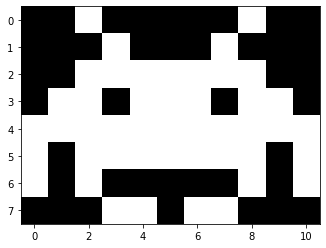

In [39]:
canvas = np.zeros((8,11))

canvas[4:6] = 1
canvas[3,1:] = 1

canvas[2,2:] = 1
canvas[[0,1],[2,3]] = 1

canvas[[6], [0,2]] = 1

canvas[7, 3:-3] = 1

canvas[[3,5,7],[3,1,5]] = 0

x = canvas[:, 4::-1]
canvas[:,6:] = x

print(x)
print(canvas)

plt.imshow(canvas, cmap='gray')

### Exercise 5 - Draw a circle

Draw a full circle: first define a resolution e.g. $N=50$. Then define coordinates $x$ and $y$ using `np.linspace()` and pass the resolution as parameter `num=N`. Use `np.meshgrid()` to define a grid `xx` and `yy`. Define a canvas of shape `(N, N)` using `np.zeros()`. Then use the circle formula $x^2 + y^2 < r^2$ to define all circle points on the grid (use $r=2$). Then use the boolean 2D expression to set the inside of the circle to 1. Finally plot the canvas using `imshow()`.

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

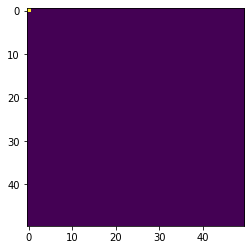

In [57]:
N = 50

x = np.linspace(0, 250, num=N)
y = np.linspace(0, 250, num=N)
xx, yy = np.meshgrid(x, y)

#grid = np.array([xx, yy])[:, np.newaxis, :, :]
#grid.shape

a = np.zeros((N,N))

r = 2
is_circle = xx**2 + yy**2 < r**2 

plt.imshow(is_circle)
#plt.imshow(grid)

In [138]:
distance?

Object `distance` not found.


### Exercise 6 - Frequency of shades of gray

Convert the picture `numpy-meme.png` to gray scale and plot a histogram!

**Instructions:** Load the image by using `plt.imread()`. This will return a three dimensional array (width, height and colors) with values between zero and one. Using the formula `gray = red * 0.2125 + green * 0.7154 + blue * 0.0721`, convert the picture to shades of gray. Look at the shape of the image and pick the right axis by looking at the length of the array in this axis! You can first calculate a weighted version of the array by multiplying with a vector of length 3 (and the three weights) and then sum along the right axis. Check the shape of the gray image afterwards and plot it using `plt.imshow()` with the parameter `cmap='gray'`. It should be only two dimensional now. Use `image_gray.flatten()` to get all pixels as one-dimensional vector and pass this to the function `plt.hist()` with the parameter `bins=50` to get 50 bins with different gray values.

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [14]:
matplotlib.rc('figure', figsize=(15, 10))


### Exercise 7 - Count colors  (optional)

Calculate the number of colors used in the picture `numpy-meme.png` and the percentage of the color space (3 x 8bit, i.e. 256 values per color) used!

**Instructions:** Load the image by using `plt.imread()`. This will return a three dimensional array (width, height and colors) with values between zero and one. Multiplying the array with 255 will restore the original 8bit values (integer values between 0 and 255). After multiplying by 255 use `image = image.astype(int)` to convert the image to integer type. Plot the `image` using `plt.imshow()` to see the image and guess the result. Check the shape of the array. One of the axes is of length three - this is the color axis (red, green and blue). We want to map all colors to unique integers. This can be done by defining `colors = red  + green * 256 + blue * 256**2`. This is a unique mapping between the triples `(red, green, blue)` and the integers `color` similar to decimal digits (three values between 0 and 9 e.g. `(3, 5, 1)` can be mapped to a three digit number `3 + 5 * 10 + 1 * 100 = 153`). Then use `np.unique()` to get an array with unique colors (in the mapped form as in `color`). This can be used to determine the number of unique colors in the image. This value can also be used to calculate the percentage of the color space used.

<small>Image source: https://me.me/i/1-import-numpy-1-import-numpy-as-np-there-is-e4a6fb9cf75b413dbb3154794fd3d603</small>

In [17]:
plt.imread('numpy-meme.png').shape



(423, 500, 3)

Inspired by [this exercise](https://github.com/rougier/numpy-100/blob/master/100_Numpy_exercises_with_solutions.md#66-considering-a-wh3-image-of-dtypeubyte-compute-the-number-of-unique-colors-) (MIT licensed, [DOI](https://zenodo.org/badge/latestdoi/10173/rougier/numpy-100))